<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev3/s10/EVA4_S10_Solution_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session9 : CIFAR 10

**Target**: 


*   Move your last code's transformations to Albumentations. Apply ToTensor, HorizontalFlip, Normalize (at min) + More (for additional points)
Please make sure that your test_transforms are simple and only using ToTensor and Normalize
*   Implement GradCam function as a module. 
Your final code (notebook file) must use imported functions to implement transformations and GradCam functionality
*   Target Accuracy is 87%
*   Submit answers to S9-Assignment-Solution. 

**Results**

*  Total Parameters = 
*  After 10 Epochs, Final Train Accuracy = 
*  After 10 Epochs, Final Test Accuracy =

**Analysis**

*  Target accuracy > 87% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Module and Models 

In [1]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev3 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models
     |████████████████████████████████| 634kB 4.8MB/s 



## 2. Loading train and test data with transforms and loader functions

In [2]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

  pip install torch-lr-finder -v --global-option="amp"


CUDA availability ? True


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [3]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

# The Model

In [4]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [5]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


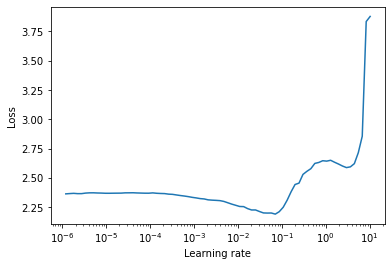

In [7]:
from EVA4.Modules import LRFinder
import torch.optim as optim

model = net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, weight_decay=1e-2,momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial stat

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1)

# Training and Testing

In [14]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(50):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)
    scheduler.step(train.train_losses[-1])

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=0.5458797216415405 Batch_id=390 Accuracy=83.56: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8559/10000 (85.59%)


Epoch: 1


Loss=0.3493833541870117 Batch_id=390 Accuracy=84.25: 100%|██████████| 391/391 [00:28<00:00, 13.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8638/10000 (86.38%)


Epoch: 2


Loss=0.32248541712760925 Batch_id=390 Accuracy=85.11: 100%|██████████| 391/391 [00:28<00:00, 13.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8581/10000 (85.81%)


Epoch: 3


Loss=0.5031613707542419 Batch_id=390 Accuracy=85.60: 100%|██████████| 391/391 [00:27<00:00, 13.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8743/10000 (87.43%)


Epoch: 4


Loss=0.3586527407169342 Batch_id=390 Accuracy=86.10: 100%|██████████| 391/391 [00:27<00:00, 13.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8715/10000 (87.15%)


Epoch: 5


Loss=0.32855886220932007 Batch_id=390 Accuracy=86.49: 100%|██████████| 391/391 [00:28<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8643/10000 (86.43%)


Epoch: 6


Loss=0.3731837868690491 Batch_id=390 Accuracy=87.44: 100%|██████████| 391/391 [00:27<00:00, 13.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8743/10000 (87.43%)


Epoch: 7


Loss=0.4415922164916992 Batch_id=390 Accuracy=87.56: 100%|██████████| 391/391 [00:28<00:00, 13.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8816/10000 (88.16%)


Epoch: 8


Loss=0.2773282527923584 Batch_id=390 Accuracy=88.12: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8794/10000 (87.94%)


Epoch: 9


Loss=0.3354725241661072 Batch_id=390 Accuracy=88.47: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8821/10000 (88.21%)


Epoch: 10


Loss=0.2681533098220825 Batch_id=390 Accuracy=88.65: 100%|██████████| 391/391 [00:27<00:00, 13.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8822/10000 (88.22%)


Epoch: 11


Loss=0.20633578300476074 Batch_id=390 Accuracy=89.06: 100%|██████████| 391/391 [00:27<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8888/10000 (88.88%)


Epoch: 12


Loss=0.29352515935897827 Batch_id=390 Accuracy=89.75: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8901/10000 (89.01%)


Epoch: 13


Loss=0.2902158200740814 Batch_id=390 Accuracy=90.11: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8904/10000 (89.04%)


Epoch: 14


Loss=0.28191956877708435 Batch_id=390 Accuracy=90.10: 100%|██████████| 391/391 [00:27<00:00, 14.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8914/10000 (89.14%)


Epoch: 15


Loss=0.30949532985687256 Batch_id=390 Accuracy=90.59: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8988/10000 (89.88%)


Epoch: 16


Loss=0.3355090320110321 Batch_id=390 Accuracy=90.77: 100%|██████████| 391/391 [00:27<00:00, 14.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8953/10000 (89.53%)


Epoch: 17


Loss=0.23585215210914612 Batch_id=390 Accuracy=90.83: 100%|██████████| 391/391 [00:28<00:00, 13.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8926/10000 (89.26%)


Epoch: 18


Loss=0.13876643776893616 Batch_id=390 Accuracy=91.21: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9008/10000 (90.08%)


Epoch: 19


Loss=0.2766721844673157 Batch_id=390 Accuracy=91.56: 100%|██████████| 391/391 [00:27<00:00, 14.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8989/10000 (89.89%)


Epoch: 20


Loss=0.2943204939365387 Batch_id=390 Accuracy=91.56: 100%|██████████| 391/391 [00:27<00:00, 14.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8930/10000 (89.30%)


Epoch: 21


Loss=0.10539300739765167 Batch_id=390 Accuracy=91.73: 100%|██████████| 391/391 [00:27<00:00, 13.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8990/10000 (89.90%)


Epoch: 22


Loss=0.20918941497802734 Batch_id=390 Accuracy=92.22: 100%|██████████| 391/391 [00:27<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8994/10000 (89.94%)


Epoch: 23


Loss=0.15444526076316833 Batch_id=390 Accuracy=92.26: 100%|██████████| 391/391 [00:28<00:00, 13.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9039/10000 (90.39%)


Epoch: 24


Loss=0.2454361915588379 Batch_id=390 Accuracy=92.25: 100%|██████████| 391/391 [00:28<00:00, 13.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9013/10000 (90.13%)


Epoch: 25


Loss=0.09385089576244354 Batch_id=390 Accuracy=92.60: 100%|██████████| 391/391 [00:28<00:00, 13.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8957/10000 (89.57%)


Epoch: 26


Loss=0.40435847640037537 Batch_id=390 Accuracy=92.71: 100%|██████████| 391/391 [00:28<00:00, 13.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8994/10000 (89.94%)


Epoch: 27


Loss=0.1709647923707962 Batch_id=390 Accuracy=92.75: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8988/10000 (89.88%)


Epoch: 28


Loss=0.1915314942598343 Batch_id=390 Accuracy=92.98: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8965/10000 (89.65%)


Epoch: 29


Loss=0.09544149041175842 Batch_id=390 Accuracy=93.04: 100%|██████████| 391/391 [00:27<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9073/10000 (90.73%)


Epoch: 30


Loss=0.31623807549476624 Batch_id=390 Accuracy=93.09: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9054/10000 (90.54%)


Epoch: 31


Loss=0.14843282103538513 Batch_id=390 Accuracy=93.24: 100%|██████████| 391/391 [00:28<00:00, 13.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9016/10000 (90.16%)


Epoch: 32


Loss=0.2748357653617859 Batch_id=390 Accuracy=93.45: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9061/10000 (90.61%)


Epoch: 33


Loss=0.10502245277166367 Batch_id=390 Accuracy=93.38: 100%|██████████| 391/391 [00:27<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9071/10000 (90.71%)


Epoch: 34


Loss=0.2622630298137665 Batch_id=390 Accuracy=93.46: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9082/10000 (90.82%)


Epoch: 35


Loss=0.26886609196662903 Batch_id=390 Accuracy=93.66: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9079/10000 (90.79%)


Epoch: 36


Loss=0.280977725982666 Batch_id=390 Accuracy=93.77: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9059/10000 (90.59%)


Epoch: 37


Loss=0.21354278922080994 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [00:28<00:00, 13.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9188/10000 (91.88%)


Epoch: 38


Loss=0.10931488126516342 Batch_id=390 Accuracy=95.32: 100%|██████████| 391/391 [00:28<00:00, 13.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9209/10000 (92.09%)


Epoch: 39


Loss=0.1010424867272377 Batch_id=390 Accuracy=95.58: 100%|██████████| 391/391 [00:28<00:00, 13.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9221/10000 (92.21%)


Epoch: 40


Loss=0.13890588283538818 Batch_id=390 Accuracy=95.69: 100%|██████████| 391/391 [00:28<00:00, 13.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9225/10000 (92.25%)


Epoch: 41


Loss=0.2672862410545349 Batch_id=390 Accuracy=95.79: 100%|██████████| 391/391 [00:28<00:00, 13.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9252/10000 (92.52%)


Epoch: 42


Loss=0.02830369397997856 Batch_id=390 Accuracy=95.74: 100%|██████████| 391/391 [00:28<00:00, 13.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9264/10000 (92.64%)


Epoch: 43


Loss=0.05207473784685135 Batch_id=390 Accuracy=95.76: 100%|██████████| 391/391 [00:28<00:00, 13.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9241/10000 (92.41%)


Epoch: 44


Loss=0.10638248920440674 Batch_id=390 Accuracy=95.91: 100%|██████████| 391/391 [00:28<00:00, 13.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9245/10000 (92.45%)


Epoch: 45


Loss=0.11105842888355255 Batch_id=390 Accuracy=95.94: 100%|██████████| 391/391 [00:28<00:00, 13.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9247/10000 (92.47%)


Epoch: 46


Loss=0.0832848995923996 Batch_id=390 Accuracy=95.95: 100%|██████████| 391/391 [00:27<00:00, 14.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9249/10000 (92.49%)


Epoch: 47


Loss=0.0885782465338707 Batch_id=390 Accuracy=95.96: 100%|██████████| 391/391 [00:28<00:00, 13.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9271/10000 (92.71%)


Epoch: 48


Loss=0.18310660123825073 Batch_id=390 Accuracy=96.03: 100%|██████████| 391/391 [00:28<00:00, 13.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9267/10000 (92.67%)


Epoch: 49


Loss=0.08036552369594574 Batch_id=390 Accuracy=96.06: 100%|██████████| 391/391 [00:28<00:00, 13.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9256/10000 (92.56%)


Epoch: 50


Loss=0.06091304495930672 Batch_id=390 Accuracy=96.21: 100%|██████████| 391/391 [00:27<00:00, 14.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9264/10000 (92.64%)


Epoch: 51


Loss=0.1851925104856491 Batch_id=390 Accuracy=96.16: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9260/10000 (92.60%)


Epoch: 52


Loss=0.08592250198125839 Batch_id=390 Accuracy=96.17: 100%|██████████| 391/391 [00:27<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9246/10000 (92.46%)


Epoch: 53


Loss=0.0532936230301857 Batch_id=390 Accuracy=96.09: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9266/10000 (92.66%)


Epoch: 54


Loss=0.06802262365818024 Batch_id=390 Accuracy=96.26: 100%|██████████| 391/391 [00:28<00:00, 13.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9266/10000 (92.66%)


Epoch: 55


Loss=0.11816276609897614 Batch_id=390 Accuracy=96.23: 100%|██████████| 391/391 [00:28<00:00, 13.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9253/10000 (92.53%)


Epoch: 56


Loss=0.10802443325519562 Batch_id=390 Accuracy=96.29: 100%|██████████| 391/391 [00:27<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9258/10000 (92.58%)


Epoch: 57


Loss=0.13828550279140472 Batch_id=390 Accuracy=96.35: 100%|██████████| 391/391 [00:27<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9262/10000 (92.62%)


Epoch: 58


Loss=0.16507752239704132 Batch_id=390 Accuracy=96.32: 100%|██████████| 391/391 [00:28<00:00, 13.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9262/10000 (92.62%)


Epoch: 59


Loss=0.09212169051170349 Batch_id=390 Accuracy=96.22: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9265/10000 (92.65%)


Epoch: 60


Loss=0.09601320326328278 Batch_id=390 Accuracy=96.19: 100%|██████████| 391/391 [00:28<00:00, 13.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9260/10000 (92.60%)


Epoch: 61


Loss=0.07712363451719284 Batch_id=390 Accuracy=96.28: 100%|██████████| 391/391 [00:28<00:00, 13.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9256/10000 (92.56%)


Epoch: 62


Loss=0.04469398781657219 Batch_id=390 Accuracy=96.40: 100%|██████████| 391/391 [00:28<00:00, 13.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9264/10000 (92.64%)


Epoch: 63


Loss=0.05357092618942261 Batch_id=390 Accuracy=96.42: 100%|██████████| 391/391 [00:28<00:00, 13.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9264/10000 (92.64%)


Epoch: 64


Loss=0.042844004929065704 Batch_id=390 Accuracy=96.28: 100%|██████████| 391/391 [00:28<00:00, 13.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9256/10000 (92.56%)


Epoch: 65


Loss=0.1095934510231018 Batch_id=390 Accuracy=96.43: 100%|██████████| 391/391 [00:28<00:00, 13.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9266/10000 (92.66%)


Epoch: 66


Loss=0.1038489118218422 Batch_id=390 Accuracy=96.33: 100%|██████████| 391/391 [00:28<00:00, 13.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9261/10000 (92.61%)


Epoch: 67


Loss=0.04509393498301506 Batch_id=390 Accuracy=96.23: 100%|██████████| 391/391 [00:28<00:00, 13.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9257/10000 (92.57%)


Epoch: 68


Loss=0.1458582878112793 Batch_id=390 Accuracy=96.31: 100%|██████████| 391/391 [00:28<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9270/10000 (92.70%)


Epoch: 69


Loss=0.17808859050273895 Batch_id=390 Accuracy=96.43: 100%|██████████| 391/391 [00:28<00:00, 13.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9265/10000 (92.65%)


Epoch: 70


Loss=0.09178805351257324 Batch_id=390 Accuracy=96.44: 100%|██████████| 391/391 [00:28<00:00, 13.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9273/10000 (92.73%)


Epoch: 71


Loss=0.1528441607952118 Batch_id=390 Accuracy=96.33: 100%|██████████| 391/391 [00:28<00:00, 13.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9264/10000 (92.64%)


Epoch: 72


Loss=0.0631084144115448 Batch_id=390 Accuracy=96.42: 100%|██████████| 391/391 [00:28<00:00, 13.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9267/10000 (92.67%)


Epoch: 73


Loss=0.09595202654600143 Batch_id=390 Accuracy=96.31: 100%|██████████| 391/391 [00:28<00:00, 13.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9273/10000 (92.73%)


Epoch: 74


Loss=0.10462673753499985 Batch_id=390 Accuracy=96.53: 100%|██████████| 391/391 [00:28<00:00, 13.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9270/10000 (92.70%)


Epoch: 75


Loss=0.08595021814107895 Batch_id=390 Accuracy=96.44: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9269/10000 (92.69%)


Epoch: 76


Loss=0.09137613326311111 Batch_id=390 Accuracy=96.47: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9264/10000 (92.64%)


Epoch: 77


Loss=0.07458598911762238 Batch_id=390 Accuracy=96.31: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9251/10000 (92.51%)


Epoch: 78


Loss=0.11226718127727509 Batch_id=390 Accuracy=96.44: 100%|██████████| 391/391 [00:28<00:00, 13.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9271/10000 (92.71%)


Epoch: 79


Loss=0.08895649015903473 Batch_id=390 Accuracy=96.40: 100%|██████████| 391/391 [00:28<00:00, 13.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9271/10000 (92.71%)


Epoch: 80


Loss=0.1887560784816742 Batch_id=390 Accuracy=96.47: 100%|██████████| 391/391 [00:28<00:00, 13.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9273/10000 (92.73%)


Epoch: 81


Loss=0.12133578211069107 Batch_id=390 Accuracy=96.34: 100%|██████████| 391/391 [00:28<00:00, 13.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9264/10000 (92.64%)


Epoch: 82


Loss=0.11471645534038544 Batch_id=390 Accuracy=96.35: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9267/10000 (92.67%)


Epoch: 83


Loss=0.08221755921840668 Batch_id=390 Accuracy=96.31: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9264/10000 (92.64%)


Epoch: 84


Loss=0.016767781227827072 Batch_id=390 Accuracy=96.44: 100%|██████████| 391/391 [00:28<00:00, 13.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9270/10000 (92.70%)


Epoch: 85


Loss=0.20200662314891815 Batch_id=390 Accuracy=96.36: 100%|██████████| 391/391 [00:28<00:00, 13.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9270/10000 (92.70%)


Epoch: 86


Loss=0.03322475031018257 Batch_id=390 Accuracy=96.36: 100%|██████████| 391/391 [00:27<00:00, 13.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9262/10000 (92.62%)


Epoch: 87


Loss=0.0406482070684433 Batch_id=390 Accuracy=96.42: 100%|██████████| 391/391 [00:27<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9264/10000 (92.64%)


Epoch: 88


Loss=0.09473013132810593 Batch_id=390 Accuracy=96.28: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9263/10000 (92.63%)


Epoch: 89


Loss=0.16161932051181793 Batch_id=390 Accuracy=96.42: 100%|██████████| 391/391 [00:27<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9266/10000 (92.66%)


Epoch: 90


Loss=0.16215747594833374 Batch_id=390 Accuracy=96.42: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9270/10000 (92.70%)


Epoch: 91


Loss=0.049633871763944626 Batch_id=390 Accuracy=96.41: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9272/10000 (92.72%)


Epoch: 92


Loss=0.06865862756967545 Batch_id=390 Accuracy=96.47: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9271/10000 (92.71%)


Epoch: 93


Loss=0.10017969459295273 Batch_id=390 Accuracy=96.28: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9279/10000 (92.79%)


Epoch: 94


Loss=0.10362434387207031 Batch_id=390 Accuracy=96.30: 100%|██████████| 391/391 [00:28<00:00, 13.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9272/10000 (92.72%)


Epoch: 95


Loss=0.07538077980279922 Batch_id=390 Accuracy=96.38: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9274/10000 (92.74%)


Epoch: 96


Loss=0.09781835973262787 Batch_id=390 Accuracy=96.49: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9256/10000 (92.56%)


Epoch: 97


Loss=0.15799815952777863 Batch_id=390 Accuracy=96.33: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9262/10000 (92.62%)


Epoch: 98


Loss=0.07189483940601349 Batch_id=390 Accuracy=96.33: 100%|██████████| 391/391 [00:28<00:00, 13.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9265/10000 (92.65%)


Epoch: 99


Loss=0.08052822202444077 Batch_id=390 Accuracy=96.34: 100%|██████████| 391/391 [00:27<00:00, 14.03it/s]



Test set: Average loss: 0.0023, Accuracy: 9272/10000 (92.72%)

Finished Training


# display an image from the test set

Files already downloaded and verified


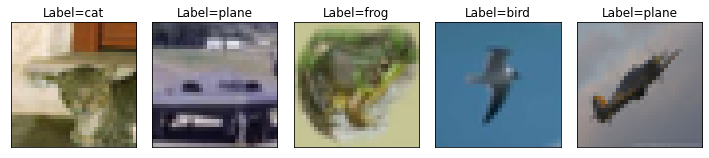

In [0]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

# Prediction of sampe test set

In [0]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:   ship  ship  bird  bird   cat


# Plotting Train & Test Accuracy/Losses

Text(0.5, 1.0, 'Test Accuracy')

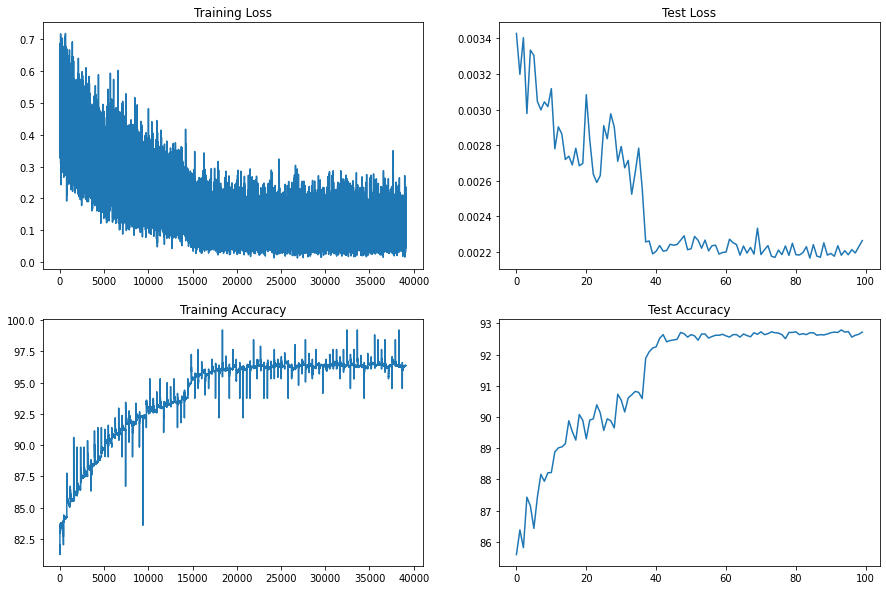

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test.test_acc)
axs[1, 1].set_title("Test Accuracy")

# Evaluating test Accuracy over different classes 

In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  7 %
Accuracy of   car :  0 %
Accuracy of  bird : 50 %
Accuracy of   cat :  3 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship : 68 %
Accuracy of truck :  5 %


Files already downloaded and verified


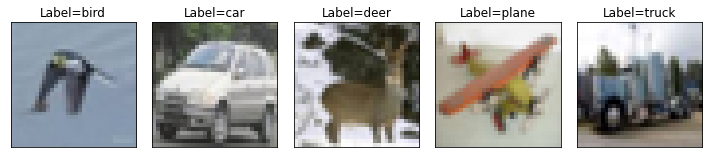

In [0]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

In [0]:
# initialize a model, model_dict and gradcam
resnet = net
resnet.eval()
gradcam = GradCAM.from_config(model_type='resnet', arch=resnet, layer_name='layer4')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


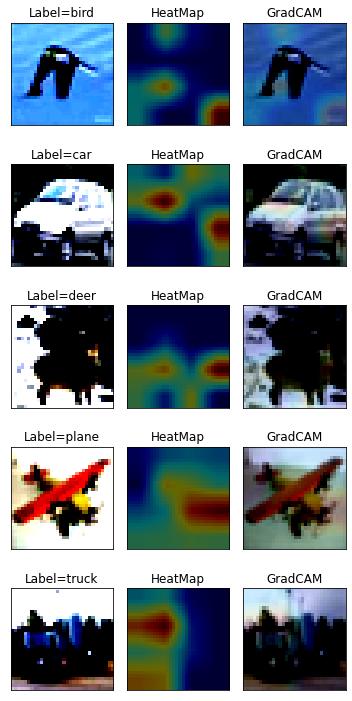

In [0]:
fig = plt.figure(figsize=(5, 10))
idx_cnt=1
for idx in np.arange(len(labels.numpy())):

  img = images[idx]
  lbl = labels.numpy()[idx]

  # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
  img = img.unsqueeze(0).to(device)
  normed_img = normalize(img,mean=(0.4914, 0.4822, 0.4465),std=(0.2023, 0.1994, 0.2010))

  # get a GradCAM saliency map on the class index 10.
  mask, logit = gradcam(normed_img, class_idx=lbl)
  # make heatmap from mask and synthesize saliency map using heatmap and img
  heatmap, cam_result = visualize_cam(mask, img, alpha=0.4)

  # Show images
  # for idx in np.arange(len(labels.numpy())):
  # Original picture
  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(img[0].cpu().numpy(),(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("Label={}".format(str(classes[lbl])))
  idx_cnt+=1

  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(heatmap,(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("HeatMap".format(str(classes[lbl])))
  idx_cnt+=1

  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(cam_result,(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("GradCAM".format(str(classes[lbl])))
  idx_cnt+=1

fig.tight_layout()  
plt.show()